In [0]:
import json
import pandas as pd

with open("via_export_coco_dogs.json",encoding='utf-8', errors='ignore') as json_data:
     data = json.load(json_data, strict=False)

Annotated data is downloaded in json format. 
Each key of json is explained below.


*   Info : Contains information about Year, Version, description, date created etc.
*   Images : It contains detail about images like: Image height, image width, filename, date_captured.
*   Annotation : It contains details about bounding box that we have created using VGG Annotator.
        * id
        * image id
        * segmentation id 
        * area - Area of bounding box
        * bbox - 4 points, [x,y, bbox_width, bbox_height]
        * iscrowd - Wether there is single image. iscrowd = 0, or group of image, iscrowd = 1.
* License 
* Category - It has information about the fields we annotated, like class etc. 



In [0]:
x = pd.DataFrame.from_dict(data['annotations'])
y = pd.DataFrame.from_dict(data['images'])

In [26]:
x.head(2)

,id,image_id,segmentation,area,bbox,iscrowd
0,0,0,"[75, 47, 257, 47, 257, 405, 75, 405]",65156,"[75, 47, 182, 358]",0
1,1,1,"[112, 31, 370, 31, 370, 486, 112, 486]",117390,"[112, 31, 258, 455]",0


In [27]:
y.head(2)

,id,width,height,file_name,license,date_captured
0,0,300,430,n02085620_199.jpg,1,
1,1,400,500,n02085620_242.jpg,1,


In [0]:
df = y.merge(x, on='id', how='left').drop(columns = ['license','date_captured', 'image_id', 'iscrowd','segmentation','area' ]).rename(columns = {'width':'img_width', 'height':'img_height'})

In [29]:
df.head(2)

,id,img_width,img_height,file_name,bbox
0,0,300,430,n02085620_199.jpg,"[75, 47, 182, 358]"
1,1,400,500,n02085620_242.jpg,"[112, 31, 258, 455]"


In [0]:
width = []
height = []
x = []
y = []
for i in range(0,len(df)):
    x.append(df['bbox'][i][0])
    y.append(df['bbox'][i][1])
    width.append(df['bbox'][i][2])
    height.append(df['bbox'][i][3])
df['x'], df['y'],df['bbox_width'], df['bbox_height'] = x, y, width, height

In [0]:
# Normalized image

df['Norm_bbox_width'], df['Norm_bbox_height'] = df['bbox_width']/df['img_width'], df['bbox_height']/df['img_height']

df['Norm_x'], df['Norm_y'] = df['x']/df['img_width'], df['y']/df['img_height']

In [0]:
new_df = df[['file_name', 'Norm_bbox_width', 'Norm_bbox_height',
       'Norm_x', 'Norm_y' ]]

In [33]:
new_df.head(2)

,file_name,Norm_bbox_width,Norm_bbox_height,Norm_x,Norm_y
0,n02085620_199.jpg,0.606667,0.832558,0.25,0.109302
1,n02085620_242.jpg,0.645000,0.910000,0.28,0.062000


Using Elbow Method

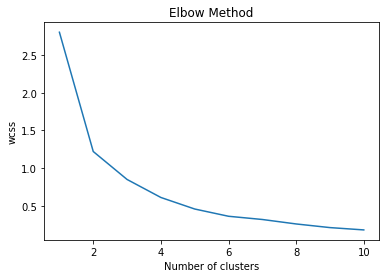

In [34]:
kmeans_data = new_df.iloc[:,[1,2]].values

from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter = 300,n_init=10,random_state=0)
  kmeans.fit(kmeans_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.show()

Performing K-Means

In [0]:

kmeans=KMeans(n_clusters=2,init='k-means++',max_iter = 300,n_init=10,random_state=0)

y_kmeans=kmeans.fit_predict(kmeans_data)

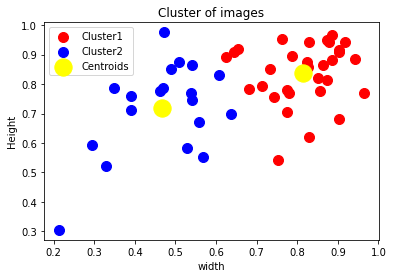

In [38]:
plt.scatter(kmeans_data[y_kmeans==0, 0], kmeans_data[y_kmeans ==0, 1], s=100, c='red', label = 'Cluster1')
plt.scatter(kmeans_data[y_kmeans==1, 0], kmeans_data[y_kmeans ==1, 1], s=100, c='blue', label = 'Cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids') 
plt.title('Cluster of images')
plt.xlabel('width')
plt.ylabel ('Height')
plt.legend()
plt.show()